In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = 'C:/Users/pradeepo/Downloads/Kaggle/Energy/train.csv'

In [4]:
data_test = 'C:/Users/pradeepo/Downloads/Kaggle/Energy/test.csv'

In [5]:
dftrain = pd.read_csv(data)

In [6]:
dftrain.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [7]:
dftrain.shape

(20216100, 4)

In [8]:
target = dftrain['meter_reading']

In [9]:
dftest = pd.read_csv(data_test)

In [10]:
df = pd.concat((dftrain,dftest),sort=False)

In [11]:
df.drop(['row_id'],axis = 1,inplace=True)

In [12]:
df['building_id']=df.building_id.astype('int16')

In [13]:
df['meter']=df.meter.astype('int8')

In [14]:
train = df[:20216100]
test = df[20216100:]

In [15]:
data1 = 'C:/Users/pradeepo/Downloads/Kaggle/Energy/building_metadata.csv'

In [25]:
dfmeta = pd.read_csv(data1)

In [26]:
dfmeta.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [27]:
dfmeta = dfmeta.drop('floor_count', axis=1)

In [28]:
dfmeta.loc[dfmeta.year_built.isnull(), 'year_built'] = dfmeta.groupby('primary_use').year_built.transform('median')

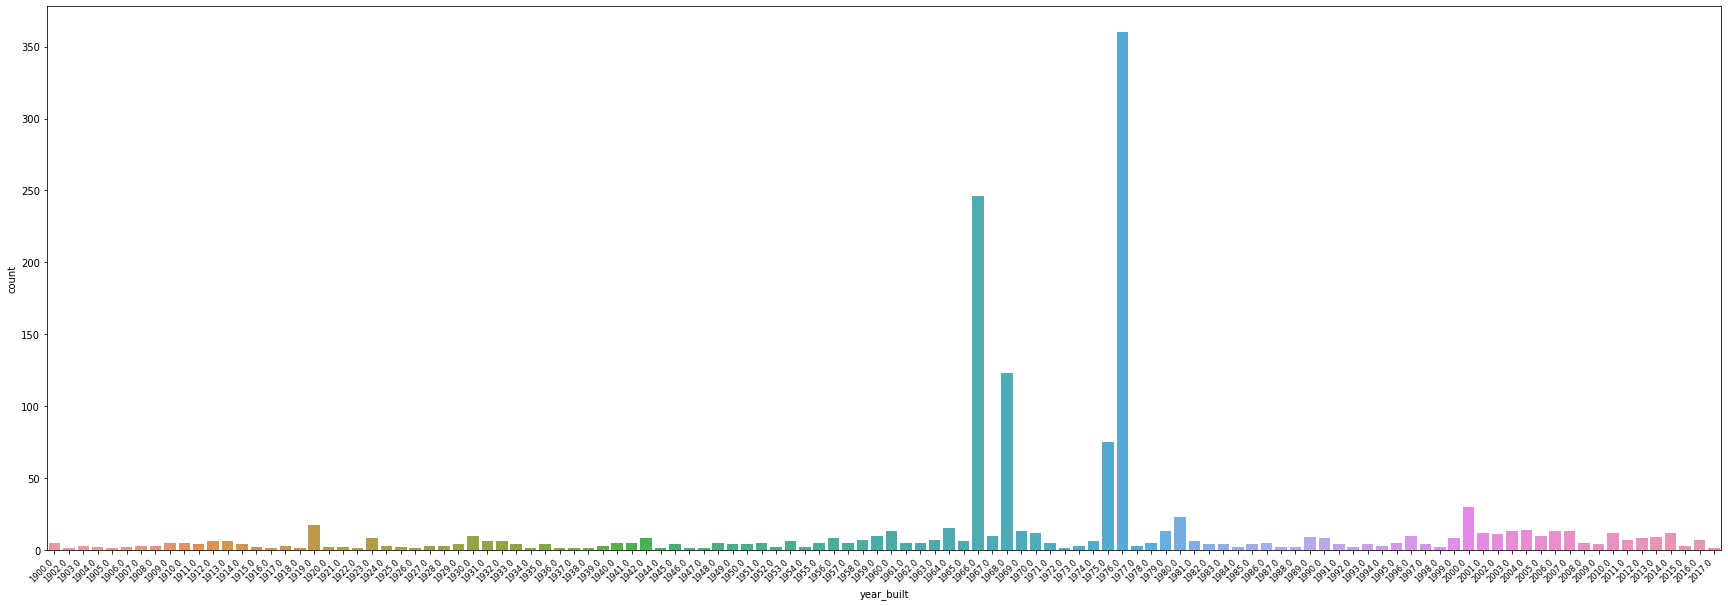

In [128]:
plt.figure(figsize=(30,10))
chart = sns.countplot(dfmeta['year_built'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize='small')
plt.savefig('year.jpg')
plt.show()

In [29]:
dfmeta = dfmeta.fillna(2000)

dfmeta['year_built'] = dfmeta['year_built'].astype('category')

In [31]:
dfmeta.head()

,site_id,building_id,primary_use,square_feet,year_built
0,0,0,Education,7432,2008.0
1,0,1,Education,2720,2004.0
2,0,2,Education,5376,1991.0
3,0,3,Education,23685,2002.0
4,0,4,Education,116607,1975.0


In [32]:
dfencode= dfmeta.drop('primary_use', axis=1)

dfencode = pd.get_dummies(dfmeta, columns = ['primary_use'], prefix = ['primary'])

# Standardizing square_feet

In [33]:
dfencode['square_feet'] = (dfencode['square_feet']-dfencode['square_feet'].mean())/dfencode['square_feet'].std()

In [34]:
dfencode = dfencode[dfencode.square_feet<4]

# Continue

In [35]:
weatherdata = 'C:/Users/pradeepo/Downloads/Kaggle/Energy/weather_train.csv'

In [36]:
dfw = pd.read_csv(weatherdata)

In [37]:
dfw.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


# precip_depth_1_hr

In [38]:
dfw.precip_depth_1_hr.value_counts()

 0.0      77910
-1.0       5780
 3.0       1469
 5.0        720
 2.0        517
 8.0        447
 10.0       369
 13.0       264
 15.0       194
 18.0       167
 20.0       127
 7.0        103
 6.0         90
 23.0        80
 25.0        75
 33.0        73
 28.0        70
 4.0         68
 30.0        68
 38.0        50
 36.0        47
 43.0        39
 11.0        38
 41.0        38
 9.0         36
 12.0        36
 46.0        32
 17.0        29
 53.0        25
 48.0        20
          ...  
 343.0        2
 164.0        2
 201.0        2
 150.0        2
 217.0        2
 163.0        2
 47.0         2
 236.0        2
 162.0        2
 42.0         2
 310.0        2
 221.0        2
 103.0        2
 105.0        2
 198.0        2
 152.0        2
 241.0        2
 340.0        2
 142.0        2
 196.0        2
 107.0        2
 211.0        1
 78.0         1
 140.0        1
 147.0        1
 175.0        1
 73.0         1
 333.0        1
 109.0        1
 180.0        1
Name: precip_depth_1_hr,

In [39]:
dfw.groupby('timestamp')['precip_depth_1_hr'].mean()

timestamp
2016-01-01 00:00:00         NaN
2016-01-01 01:00:00   -0.300000
2016-01-01 02:00:00   -0.100000
2016-01-01 03:00:00   -0.100000
2016-01-01 04:00:00   -0.200000
2016-01-01 05:00:00    0.000000
2016-01-01 06:00:00   -0.200000
2016-01-01 07:00:00   -0.100000
2016-01-01 08:00:00    0.833333
2016-01-01 09:00:00   -0.100000
2016-01-01 10:00:00    0.666667
2016-01-01 11:00:00   -0.100000
2016-01-01 12:00:00    0.250000
2016-01-01 13:00:00    0.000000
2016-01-01 14:00:00    0.000000
2016-01-01 15:00:00    0.000000
2016-01-01 16:00:00    0.000000
2016-01-01 17:00:00    0.000000
2016-01-01 18:00:00    0.500000
2016-01-01 19:00:00    0.000000
2016-01-01 20:00:00    0.000000
2016-01-01 21:00:00    0.000000
2016-01-01 22:00:00    0.000000
2016-01-01 23:00:00    0.000000
2016-01-02 00:00:00   -0.200000
2016-01-02 01:00:00    0.000000
2016-01-02 02:00:00    0.000000
2016-01-02 03:00:00    0.000000
2016-01-02 04:00:00    0.000000
2016-01-02 05:00:00    0.000000
                         ...  

In [40]:
dfw['precip_depth_1_hr'] = dfw['precip_depth_1_hr'].fillna(method = 'ffill')

In [41]:
dfw['precip_depth_1_hr'] = dfw['precip_depth_1_hr'].fillna(method = 'bfill')

In [42]:
dfw['cloud_coverage'] = dfw['cloud_coverage'].fillna(method = 'ffill')

# All the missing values

In [45]:
dfw.fillna(method='ffill', inplace=True)

In [46]:
dfw.fillna(method='bfill', inplace=True)

# Joining all three tables

In [47]:
dfw.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,-1.0,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,6.0,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [48]:
dfencodew = pd.merge(train,dfencode,on=['building_id'])

In [49]:
dfencodew.head()

,building_id,meter,timestamp,meter_reading,site_id,square_feet,year_built
0,0,0,2016-01-01 00:00:00,0.0,0,-0.764465,2008.0
1,0,0,2016-01-01 01:00:00,0.0,0,-0.764465,2008.0
2,0,0,2016-01-01 02:00:00,0.0,0,-0.764465,2008.0
3,0,0,2016-01-01 03:00:00,0.0,0,-0.764465,2008.0
4,0,0,2016-01-01 04:00:00,0.0,0,-0.764465,2008.0


In [63]:
dtrain = pd.merge(dfencodew,dfw,on=['site_id','timestamp'], how='inner')

In [64]:
dtrain.shape

(19821757, 14)

In [65]:
to_drop = dtrain[dtrain['site_id']==0].index

In [66]:
dtrain.drop(to_drop, axis=0, inplace=True)

In [67]:
dtrain.reset_index(inplace=True)

In [68]:
dtrain.shape

(18745095, 15)

In [69]:
dtrain.drop('timestamp', axis=1, inplace=True)

In [70]:
dtrain['log_1p'] = np.log1p(dtrain['meter_reading'])

In [71]:
dtrain = dtrain[dtrain['log_1p']<10]

In [72]:
dtrain.shape

(18724626, 15)

In [73]:
target = dtrain['log_1p']

In [74]:
dtrain.drop(['meter_reading','log_1p'], axis=1, inplace=True)

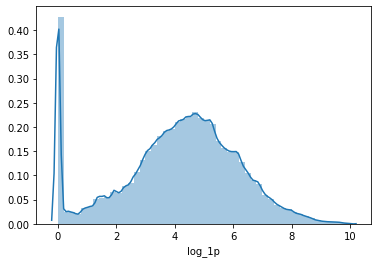

In [75]:
sns.distplot(target)

# Modeling

In [76]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error as mse
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor

In [77]:
from sklearn.preprocessing import scale, RobustScaler

In [78]:
dtrain.head()

,index,building_id,meter,site_id,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,1076662,105,0,1,-0.374549,1966.0,3.8,4.0,2.4,0.0,1020.9,240.0,3.1
1,1076663,106,0,1,-0.783044,1966.0,3.8,4.0,2.4,0.0,1020.9,240.0,3.1
2,1076664,106,3,1,-0.783044,1966.0,3.8,4.0,2.4,0.0,1020.9,240.0,3.1
3,1076665,107,0,1,0.048932,2005.0,3.8,4.0,2.4,0.0,1020.9,240.0,3.1
4,1076666,108,0,1,-0.095078,1913.0,3.8,4.0,2.4,0.0,1020.9,240.0,3.1


In [79]:
dtrain['year_built'] = dtrain['year_built'].astype('category')
dtrain['building_id'] = dtrain['building_id'].astype('category')
dtrain['meter'] = dtrain['meter'].astype('category')
dtrain['site_id'] = dtrain['site_id'].astype('category')

In [80]:
dtrain.drop('index', axis=1, inplace=True)

In [81]:
dtrain[['square_feet','air_temperature','cloud_coverage','dew_temperature','precip_depth_1_hr','sea_level_pressure','wind_direction','wind_speed']] = dtrain[['square_feet','air_temperature','cloud_coverage','dew_temperature','precip_depth_1_hr','sea_level_pressure','wind_direction','wind_speed']].astype('float16')


In [82]:
dtrain.dtypes

building_id           category
meter                 category
site_id               category
square_feet            float16
year_built            category
air_temperature        float16
cloud_coverage         float16
dew_temperature        float16
precip_depth_1_hr      float16
sea_level_pressure     float16
wind_direction         float16
wind_speed             float16
dtype: object

# PCA

In [57]:
from sklearn.decomposition import PCA

In [58]:
pca = PCA(.95)

In [86]:
dtrain = RobustScaler().fit_transform(dtrain)

In [60]:
pca_components = pca.fit_transform(dtrain)

In [61]:
pca.explained_variance_ratio_

array([0.88280826, 0.04854015, 0.01408337, 0.01275785])

In [62]:
dtrain_pca = pca.transform(dtrain)

In [63]:
dtrain_pca

array([[-1.20686821,  0.46084328,  0.60083775,  0.57421355],
       [-1.20862251,  0.48471915,  0.7446266 ,  0.58953455],
       [-1.20268348,  0.39173174, -0.93931269,  0.50066217],
       ...,
       [-2.16451323,  4.13775738, -0.36636051,  0.45935745],
       [-2.16089315,  4.15166284,  0.38248689,  0.77548462],
       [-2.16225061,  4.18088567,  0.83304923,  1.02601125]])

# Split

In [87]:
xtrain,xtest,ytrain,ytest = train_test_split(dtrain,target, test_size=0.3, random_state=123)

In [88]:
xtrain

array([[ 0.24089636,  0.        ,  0.4       , ..., -3.88235294,
         0.35      ,  0.        ],
       [-0.89635854,  0.        , -0.7       , ..., -0.64705882,
        -0.85      , -1.23887588],
       [-0.22829132,  0.        , -0.3       , ...,  0.29411765,
        -0.85      , -1.23887588],
       ...,
       [-1.01680672,  3.        , -0.7       , ...,  0.17647059,
        -0.35      , -0.39968774],
       [ 0.02661064,  1.        ,  0.        , ..., -0.76470588,
         0.8       , -0.19984387],
       [-0.66666667,  0.        , -0.6       , ...,  0.11764706,
         0.05      ,  0.40046838]])

# Deep Learning

In [89]:
from keras.models import Sequential
from keras.layers import Input, Dense, LSTM
from keras import metrics
from keras.callbacks import EarlyStopping
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [90]:
x_train = np.array(xtrain)
y_train = np.array(ytrain)

In [91]:
x_test = np.array(xtest)
y_test = np.array(ytest)

In [92]:
n_cols=xtrain.shape[1]
n_cols

12

In [93]:
x_train

array([[ 0.24089636,  0.        ,  0.4       , ..., -3.88235294,
         0.35      ,  0.        ],
       [-0.89635854,  0.        , -0.7       , ..., -0.64705882,
        -0.85      , -1.23887588],
       [-0.22829132,  0.        , -0.3       , ...,  0.29411765,
        -0.85      , -1.23887588],
       ...,
       [-1.01680672,  3.        , -0.7       , ...,  0.17647059,
        -0.35      , -0.39968774],
       [ 0.02661064,  1.        ,  0.        , ..., -0.76470588,
         0.8       , -0.19984387],
       [-0.66666667,  0.        , -0.6       , ...,  0.11764706,
         0.05      ,  0.40046838]])

In [185]:
model = Sequential()

In [186]:
model.add(Dense(1000,activation='relu',input_shape=(n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

In [187]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1000)              13000     
_________________________________________________________________
dense_18 (Dense)             (None, 100)               100100    
_________________________________________________________________
dense_19 (Dense)             (None, 20)                2020      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 21        
Total params: 115,141
Trainable params: 115,141
Non-trainable params: 0
_________________________________________________________________


In [188]:
model.compile(loss='mean_squared_error', optimizer='adam',metrics = [metrics.mse])

In [189]:
history = model.fit(xtrain,ytrain,epochs=10, validation_split=0.3)

Train on 9175066 samples, validate on 3932172 samples
Epoch 1/10
9175066/9175066 [==============================] - 630s 69us/step - loss: 1.7653 - mean_squared_error: 1.7653 - val_loss: 1.4819 - val_mean_squared_error: 1.4819
Epoch 2/10
9175066/9175066 [==============================] - 630s 69us/step - loss: 1.4071 - mean_squared_error: 1.4071 - val_loss: 1.3537 - val_mean_squared_error: 1.3537
Epoch 3/10
9175066/9175066 [==============================] - 632s 69us/step - loss: 1.3067 - mean_squared_error: 1.3067 - val_loss: 1.2735 - val_mean_squared_error: 1.2735
Epoch 4/10
9175066/9175066 [==============================] - 630s 69us/step - loss: 1.2525 - mean_squared_error: 1.2525 - val_loss: 1.2219 - val_mean_squared_error: 1.2219
Epoch 5/10
9175066/9175066 [==============================] - 628s 68us/step - loss: 1.2186 - mean_squared_error: 1.2186 - val_loss: 1.2123 - val_mean_squared_error: 1.2123
Epoch 6/10
9175066/9175066 [==============================] - 627s 68us/step - lo

In [171]:
ypredict_nnet = model.predict(xtest)

In [172]:
ypredict_nnet

array([[5.703151 ],
       [3.8157048],
       [4.144207 ],
       ...,
       [4.1828294],
       [1.1102031],
       [1.4740537]], dtype=float32)

In [173]:
predict_expm1 = np.expm1(ypredict_nnet)

In [174]:
predict_expm1

array([[298.8107   ],
       [ 44.40875  ],
       [ 62.06759  ],
       ...,
       [ 64.55106  ],
       [  2.0349748],
       [  3.3669016]], dtype=float32)

In [175]:
y_test_expm1 = np.expm1(ytest)

In [176]:
y_test_expm1

8960484      128.1000
14205914      39.3176
5210254       61.7700
13750004     429.6880
6139135       28.4000
13463919     327.5610
10445790     786.9000
13221770     141.1080
16056833       0.0000
17804411       4.2052
10427787      42.7000
7797225      821.9700
10884975     267.0000
9134740      345.6010
16671932       0.0000
13015794     843.7500
595962        14.6536
9373856      338.5500
12950007    4831.0000
11106861       0.0000
3179504      140.7100
15958729    1076.9500
4978138        4.3200
8801567      270.0000
10757781       0.0000
1264518       10.4900
15162080      42.6513
11696196      47.6075
9076379      245.0000
3050597       32.7600
              ...    
6081134      172.7500
6864366       28.0000
11334121     190.0000
2096466      131.1080
14369112       0.0000
15925685     594.4490
9549793     1349.5200
8372248       23.1667
3414978       52.5800
8029691        2.7083
10179051     434.0000
12496206    3062.5000
9961121       49.0000
8452199      857.0500
9840288   

In [177]:
from sklearn.metrics import mean_squared_error as mse

In [178]:
np.sqrt(mse(y_test_expm1, predict_expm1))

776.1834088200808

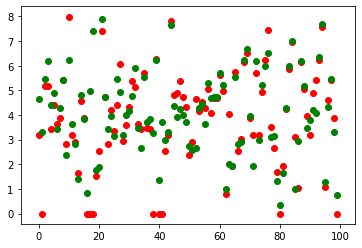

In [179]:
plt.scatter(range(100),y_test[100:200], c='r')
plt.scatter(range(100),ypredict_nnet[100:200],c='g')

# XGB

In [55]:
xgb = XGBRegressor(learning_rate=0.1,
                      n_estimators=2000,
                      max_depth=10,
                      subsample=0.5,
                      colsample_bytree=0.5,
                      objective='reg:linear',
                      nthread=30,
                      scale_pos_weight=1,
                      seed=12,
                      reg_lambda=0.6,
                      random_state=123)

# Reduction

In [60]:
xtrain.head()

,building_id,meter,site_id,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
15345148,1088,0,13,1.764759,1966,5.0,4.0,0.6,0.0,982.3,240.0,3.1
2492685,276,0,2,-0.192063,2014,17.2,4.0,8.9,0.0,1010.1,0.0,0.0
8559976,753,0,6,-0.474441,1966,5.0,0.0,1.7,0.0,1018.2,0.0,0.0
9575296,926,2,9,-0.596541,1966,6.7,0.0,-1.7,0.0,1019.7,320.0,5.7
3090725,190,3,2,0.405599,1957,27.8,4.0,22.8,0.0,1012.2,90.0,2.1


In [61]:
xtrain_reduced = xtrain.iloc[:500000]
ytrain_reduced = ytrain[:500000]

In [62]:
xtrain.shape

(13107238, 12)

In [63]:
xtest_reduced = xtest.iloc[:500000]
ytest_reduced = ytest[:500000]

In [67]:
model_reduced = xgb.fit(xtrain_reduced, ytrain_reduced)

NameError: name 'xgb' is not defined

In [60]:
predict_reduced = xgb.predict(xtest_reduced)

In [64]:
min(predict_reduced)

-5.1421623

In [61]:
np.sqrt(mse(ytest_reduced,predict_reduced))

0.945847784124625

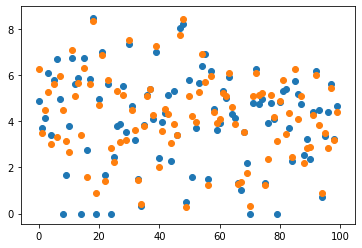

In [62]:
plt.scatter(range(100),ytest_reduced[:100])
plt.scatter(range(100),predict_reduced[:100])

# random forest

In [110]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
rf = RandomForestRegressor(n_estimators=200, n_jobs=30, min_samples_split=5, criterion='mse', min_samples_leaf=4, verbose=2)

In [64]:
model_reduced = rf.fit(xtrain_reduced, ytrain_reduced)

In [65]:
predict_reduced = rf.predict(xtest_reduced)

In [66]:
np.sqrt(mse(ytest_reduced,predict_reduced))

0.9453491055933313

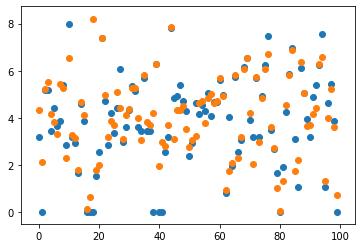

In [67]:
plt.scatter(range(100),ytest[100:200])
plt.scatter(range(100),predict_reduced[100:200])

# Full Data

In [68]:
model = rf.fit(xtrain[:10000000], ytrain[:10000000])

[Parallel(n_jobs=30)]: Using backend ThreadingBackend with 30 concurrent workers.


building tree 1 of 200building tree 2 of 200
building tree 3 of 200building tree 4 of 200building tree 5 of 200

building tree 6 of 200
building tree 7 of 200building tree 8 of 200

building tree 9 of 200building tree 10 of 200building tree 11 of 200building tree 12 of 200




building tree 13 of 200building tree 14 of 200
building tree 15 of 200

building tree 16 of 200
building tree 17 of 200building tree 18 of 200building tree 19 of 200


building tree 20 of 200building tree 21 of 200building tree 22 of 200
building tree 23 of 200building tree 24 of 200

building tree 25 of 200building tree 26 of 200building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200





building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed: 15.1min


building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200


[Parallel(n_jobs=30)]: Done 200 out of 200 | elapsed: 26.6min finished


In [69]:
predict = rf.predict(xtest)

[Parallel(n_jobs=30)]: Using backend ThreadingBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:   55.8s
[Parallel(n_jobs=30)]: Done 200 out of 200 | elapsed:  1.6min finished


In [70]:
np.sqrt(mse(ytest,predict))

1.4702784045544262

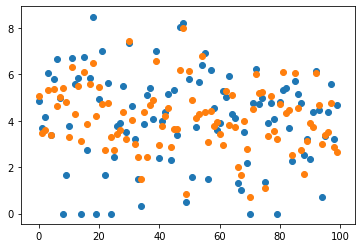

In [71]:
plt.scatter(range(100),ytest[:100])
plt.scatter(range(100),predict[:100])

In [72]:
imp = pd.DataFrame(rf.feature_importances_, dtrain.columns)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [67]:
imp = pd.DataFrame(rf.feature_importances_, xtrain.columns)

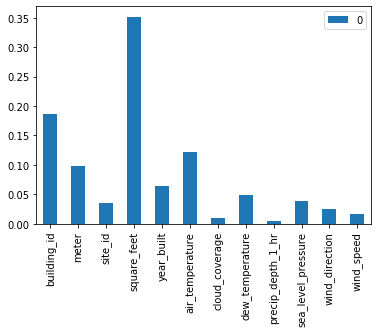

In [68]:
imp.plot(kind='bar')

In [87]:
min(predict)

0.0

# Lightgbm

In [81]:
from mlxtend.regressor import StackingCVRegressor
from lightgbm import LGBMRegressor

In [82]:
lightgbm = LGBMRegressor(objective='regression',
                         num_leaves=15, 
                         max_depth = 20,
                         learning_rate=0.1,
                         n_estimators=5000,
                         max_bin=300,
                         bagging_fraction=0.5,
                         bagging_seed=7,
                         faeture_fraction=0.2,
                         feature_fraction_seed=7,
                         verbose=-1,
                         n_jobs=30
                        )

In [83]:
lightgbm.fit(xtrain_reduced,ytrain_reduced)

LGBMRegressor(bagging_fraction=0.5, bagging_seed=7, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, faeture_fraction=0.2,
              feature_fraction_seed=7, importance_type='split',
              learning_rate=0.1, max_bin=300, max_depth=20,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=5000, n_jobs=30, num_leaves=15,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0, verbose=-1)

In [84]:
ypredict_lgbm = lightgbm.predict(xtest_reduced)

In [85]:
np.sqrt(mse(ytest_reduced,ypredict_lgbm))

0.9405646766878416

In [86]:
min(ypredict_lgbm)

-4.916478243101588

# GradientBoosting

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

In [72]:
gbr = GradientBoostingRegressor(n_estimators=1000, 
                                learning_rate=0.1, 
                                max_depth=15,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10, 
                                random_state=123)

In [88]:
gbr.fit(xtrain_reduced,ytrain_reduced)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=15,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [89]:
ypredict_gbr = gbr.predict(xtest_reduced)

In [90]:
np.sqrt(mse(ytest_reduced,ypredict_gbr))

0.9223119608803431

# Stacking

In [73]:
stack_gen = StackingCVRegressor(regressors=(gbr,lightgbm, xgb), meta_regressor=xgb, use_features_in_secondary=True, n_jobs=30)

In [ ]:
stack_gen.fit(xtrain,ytrain)

# Test weather data

In [69]:
test_weather='C:/Users/pradeepo/Downloads/Kaggle/Energy/weather_test.csv'

In [70]:
df_testw = pd.read_csv(test_weather)

In [71]:
df_testw.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,0,2017-01-01 01:00:00,17.8,2.0,12.8,0.0,1022.0,130.0,3.1
2,0,2017-01-01 02:00:00,16.1,0.0,12.8,0.0,1021.9,140.0,3.1
3,0,2017-01-01 03:00:00,17.2,0.0,13.3,0.0,1022.2,140.0,3.1
4,0,2017-01-01 04:00:00,16.7,2.0,13.3,0.0,1022.3,130.0,2.6


In [72]:
df_testw.isnull().sum()

site_id                    0
timestamp                  0
air_temperature          104
cloud_coverage        140448
dew_temperature          327
precip_depth_1_hr      95588
sea_level_pressure     21265
wind_direction         12370
wind_speed               460
dtype: int64

In [73]:
df_testw.shape

(277243, 9)

In [74]:
df_impw = df_testw.fillna(method='ffill')

In [75]:
df_impw.isnull().sum()

site_id               0
timestamp             0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     1
sea_level_pressure    0
wind_direction        0
wind_speed            0
dtype: int64

In [76]:
df_impw = df_impw.fillna(method='bfill')

In [77]:
df_impw.isnull().sum()

site_id               0
timestamp             0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
dtype: int64

# Joining tables for Test data

In [78]:
test.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2017-01-01 00:00:00,NaN
1,1,0,2017-01-01 00:00:00,NaN
2,2,0,2017-01-01 00:00:00,NaN
3,3,0,2017-01-01 00:00:00,NaN
4,4,0,2017-01-01 00:00:00,NaN


In [79]:
test.drop('meter_reading',axis=1, inplace=True)

In [80]:
dfencode

,site_id,building_id,square_feet,year_built
0,0,0,-0.764465,2008.0
1,0,1,-0.807004,2004.0
2,0,2,-0.783026,1991.0
3,0,3,-0.617738,2002.0
4,0,4,0.221136,1975.0
5,0,5,-0.759337,2000.0
6,0,6,-0.579451,1981.0
7,0,7,0.261463,1989.0
8,0,8,-0.282593,2003.0
9,0,9,-0.587811,2010.0


In [81]:
dfencode.dtypes

site_id          int64
building_id      int64
square_feet    float64
year_built     float64
dtype: object

In [82]:
dfencode.columns

Index(['site_id', 'building_id', 'square_feet', 'year_built'], dtype='object')

In [83]:
test_dfencode = pd.merge(test,dfencode, on='building_id',how='left')

In [84]:
test_dfencode.isnull().sum()

building_id         0
meter               0
timestamp           0
site_id        613200
square_feet    613200
year_built     613200
dtype: int64

In [85]:
test_dfencode.fillna(method='ffill', inplace=True)

In [86]:
dtest = pd.merge(test_dfencode,df_impw,on=['site_id','timestamp'], how='left')

In [87]:
test_dfencode.shape

(41697600, 6)

In [107]:
test.shape

(41697600, 3)

In [108]:
dtest.shape

(41697600, 13)

In [109]:
dtest.isnull().sum()

building_id                0
meter                      0
timestamp                  0
site_id                    0
square_feet                0
year_built                 0
air_temperature       199029
cloud_coverage        199029
dew_temperature       199029
precip_depth_1_hr     199029
sea_level_pressure    199029
wind_direction        199029
wind_speed            199029
dtype: int64

In [115]:
d= dtest[dtest['air_temperature'].isnull()==True]

In [121]:
d.tail()

,building_id,meter,timestamp,site_id,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
41697595,1444,0,2018-05-09 07:00:00,15.0,-0.654444,1914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41697596,1445,0,2018-05-09 07:00:00,15.0,-0.792758,1966.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41697597,1446,0,2018-05-09 07:00:00,15.0,-0.729862,1997.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41697598,1447,0,2018-05-09 07:00:00,15.0,-0.562759,2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41697599,1448,0,2018-05-09 07:00:00,15.0,0.001437,2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


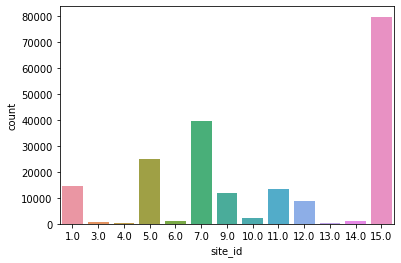

In [117]:
sns.countplot(d['site_id'])

In [88]:
dtest.loc[dtest.air_temperature.isnull(), 'air_temperature'] = dtest.groupby(['building_id','site_id']).air_temperature.transform('mean')
dtest.loc[dtest.cloud_coverage.isnull(), 'cloud_coverage'] = dtest.groupby(['building_id','site_id']).cloud_coverage.transform('mean')
dtest.loc[dtest.dew_temperature.isnull(), 'dew_temperature'] = dtest.groupby(['building_id','site_id']).dew_temperature.transform('mean')
dtest.loc[dtest.precip_depth_1_hr.isnull(), 'precip_depth_1_hr'] = dtest.groupby(['building_id','site_id']).precip_depth_1_hr.transform('mean')
dtest.loc[dtest.sea_level_pressure.isnull(), 'sea_level_pressure'] = dtest.groupby(['building_id','site_id']).sea_level_pressure.transform('mean')
dtest.loc[dtest.wind_direction.isnull(), 'wind_direction'] = dtest.groupby(['building_id','site_id']).wind_direction.transform('mean')
dtest.loc[dtest.wind_speed.isnull(), 'wind_speed'] = dtest.groupby(['building_id','site_id']).wind_speed.transform('mean')

In [129]:
dtest.isnull().sum()

building_id           0
meter                 0
timestamp             0
site_id               0
square_feet           0
year_built            0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
dtype: int64

In [89]:
dtestfilled=dtest

In [91]:
dtest.drop('timestamp', axis=1, inplace=True)

In [ ]:
test_predict = rf.predict(dtest)

In [133]:
xtrain.dtypes

building_id           category
meter                 category
site_id               category
square_feet            float64
year_built            category
air_temperature        float64
cloud_coverage         float64
dew_temperature        float64
precip_depth_1_hr      float64
sea_level_pressure     float64
wind_direction         float64
wind_speed             float64
dtype: object

In [131]:
dtestfilled.drop('timestamp', axis=1, inplace=True)

In [134]:
dtestfilled.dtypes

building_id             int16
meter                    int8
site_id               float64
square_feet           float64
year_built            float64
air_temperature       float64
cloud_coverage        float64
dew_temperature       float64
precip_depth_1_hr     float64
sea_level_pressure    float64
wind_direction        float64
wind_speed            float64
dtype: object

In [92]:
dtestfilled['building_id']=dtestfilled['building_id'].astype('category')
dtestfilled['meter']=dtestfilled['meter'].astype('category')
dtestfilled['site_id']=dtestfilled['site_id'].astype('category')
dtestfilled['year_built']=dtestfilled['year_built'].astype('category')

In [93]:
dtestfilled[['square_feet','air_temperature','cloud_coverage','dew_temperature','precip_depth_1_hr','sea_level_pressure','wind_direction','wind_speed']] = dtestfilled[['square_feet','air_temperature','cloud_coverage','dew_temperature','precip_depth_1_hr','sea_level_pressure','wind_direction','wind_speed']].astype('float16')

In [94]:
dtestfilled.dtypes

building_id           category
meter                 category
site_id               category
square_feet            float16
year_built            category
air_temperature        float16
cloud_coverage         float16
dew_temperature        float16
precip_depth_1_hr      float16
sea_level_pressure     float16
wind_direction         float16
wind_speed             float16
dtype: object

dtest_standard = scale(dtestfilled)

In [95]:
dtestfilled.isnull().sum()

building_id           0
meter                 0
site_id               0
square_feet           0
year_built            0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
dtype: int64

In [97]:
test_predict_1 = rf.predict(dtestfilled[:10000000])

[Parallel(n_jobs=30)]: Using backend ThreadingBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:   28.9s
[Parallel(n_jobs=30)]: Done 200 out of 200 | elapsed:   49.2s finished


In [98]:
test_predict_2 = rf.predict(dtestfilled[10000000:30000000])

[Parallel(n_jobs=30)]: Using backend ThreadingBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:  1.1min
[Parallel(n_jobs=30)]: Done 200 out of 200 | elapsed:  1.8min finished


In [99]:
test_predict_3 = rf.predict(dtestfilled[30000000:])

[Parallel(n_jobs=30)]: Using backend ThreadingBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:   37.2s
[Parallel(n_jobs=30)]: Done 200 out of 200 | elapsed:  1.1min finished


In [104]:
test_predict = np.concatenate((test_predict_1,test_predict_2,test_predict_3))

In [105]:
test_predict.shape

(41697600,)

In [106]:
test_predict

array([0.55915854, 0.87871279, 0.55915854, ..., 1.01629263, 5.27579564,
       1.38030587])

In [107]:
test_final = np.exp(test_predict)

In [108]:
test_final

array([  1.7492    ,   2.40779837,   1.7492    , ...,   2.76293253,
       195.54599871,   3.97611763])

In [109]:
test_final

array([  1.7492    ,   2.40779837,   1.7492    , ...,   2.76293253,
       195.54599871,   3.97611763])

In [115]:
submission = pd.DataFrame({'row_id':dftest['row_id'],'meter_reading':sub_3})

In [116]:
submission.to_csv('Energy_4.csv', index=False)

In [ ]:
dftest.head()

In [112]:
sub_2 = pd.read_csv('C:/Users/pradeepo/Energy_2.csv')

In [114]:
sub_2.head()

,row_id,meter_reading
0,0,4.685014
1,1,3.771675
2,2,4.672186
3,3,342.106470
4,4,359.056684


In [113]:
sub_3 = sub_2['meter_reading']-1

In [114]:
sub_3

0              3.685014
1              2.771675
2              3.672186
3            341.106470
4            358.056684
5              3.773852
6            342.605333
7            277.014330
8             27.749485
9            280.127156
10           342.653347
11           338.027745
12            98.283882
13            81.607434
14           288.204055
15           278.203084
16            32.727165
17           455.715219
18            78.427472
19           250.037047
20            68.878471
21           290.114314
22            10.418121
23           278.424888
24           159.009662
25           357.916962
26             3.679690
27             3.672186
28           353.610163
29           273.690707
               ...     
41697570    2166.023018
41697571      43.476115
41697572      30.924958
41697573     432.059619
41697574     197.068647
41697575     129.501512
41697576     249.123395
41697577     494.466206
41697578      40.470176
41697579    1763.199037
41697580      78

In [115]:
sub_3 = pd.read_csv('C:/Users/pradeepo/Energy_3.csv')

In [116]:
sub_3.head()

,row_id,meter_reading
0,0,1.749200
1,1,2.407798
2,2,1.749200
3,3,337.197237
4,4,484.696947


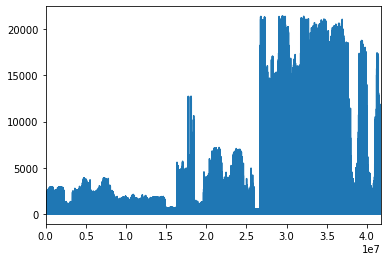

In [117]:
sub_3['meter_reading'].plot()

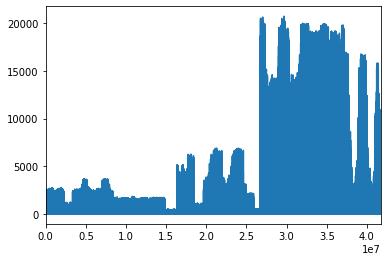

In [119]:
sub_2['meter_reading'].plot()

In [117]:
sub_4 = pd.read_csv('C:/Users/pradeepo/Energy_4.csv')

In [118]:
sub_4.head()

,row_id,meter_reading
0,0,3.685014
1,1,2.771675
2,2,3.672186
3,3,341.106470
4,4,358.056684
